### Assignment_1  

Name :- Parth Nitesh Thakkar

Roll_No :- CS22MTECH14005

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import torch
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math
import warnings
warnings.filterwarnings("ignore")
import random

# ------------------------------------------  Question 1   -------------------------------------------------

### Initializing a mean List to generate the datasets

In [ ]:
mean = [0.1,0.2,0.3,0.4,0.5]

### A function that calculates the distance of a point to line that will help us to determine the Separability

In [ ]:
def find_dist(A,B,C,x1,x2):
    return (abs(A*x1 + B*x2 + C))/(math.sqrt(A**2 + B**2))

### Below is the fixed line whose margin from the dataset will determine the Separability of the data

### Here i have taken "1*X1 + 1*X2 + 0.25 = 0" Line

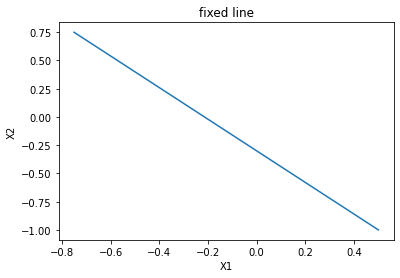

In [ ]:
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot((-0.75,0.5),(0.75,-1))
plt.title("fixed line")
plt.show()

### A  list that will store gamma,no. of corrections/changes,no. of iterations and avg no. of changes per iteration

In [ ]:
result = []

### Now we will train the perceptron for defferent gammas

----------------------------------------------------------------------------------------------------------


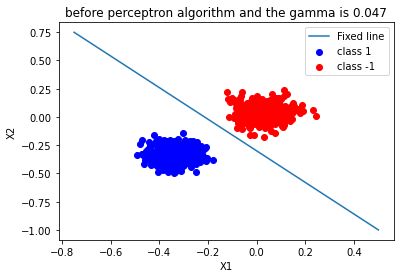

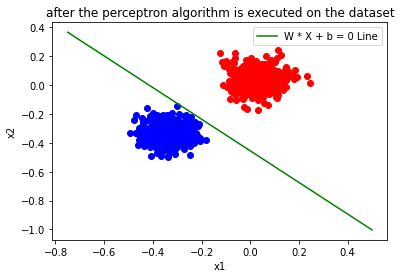

for gamma = 0.047 
it takes 17 total changes for convergence
and the upper bound is 444 (R^2/gamma^2)
----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------


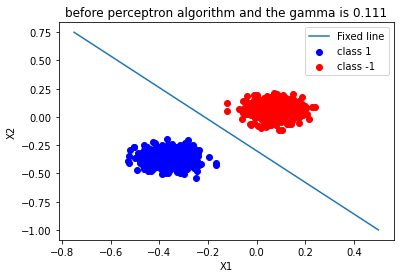

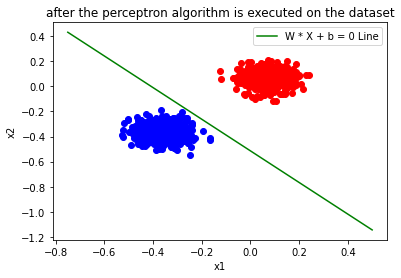

for gamma = 0.111 
it takes 15 total changes for convergence
and the upper bound is 82 (R^2/gamma^2)
----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------


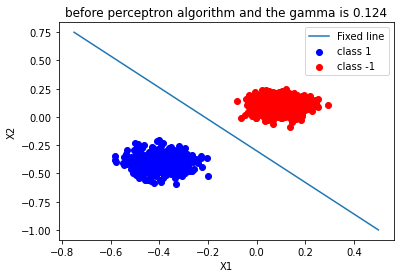

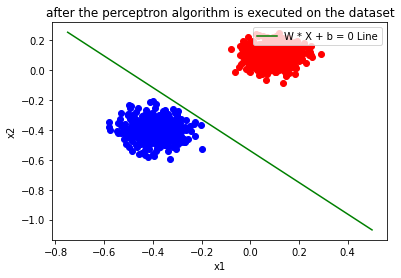

for gamma = 0.124 
it takes 11 total changes for convergence
and the upper bound is 65 (R^2/gamma^2)
----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------


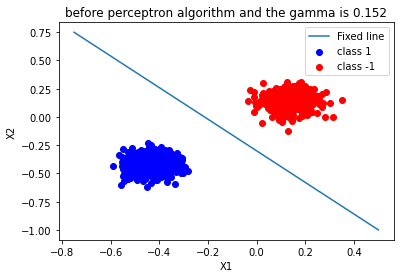

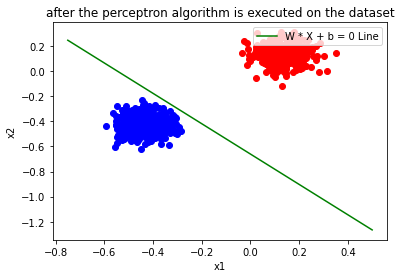

for gamma = 0.152 
it takes 9 total changes for convergence
and the upper bound is 43 (R^2/gamma^2)
----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------


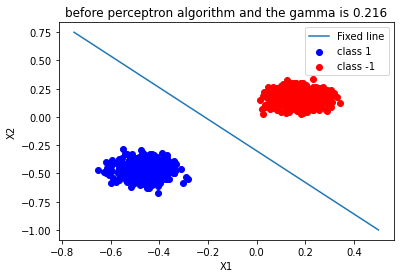

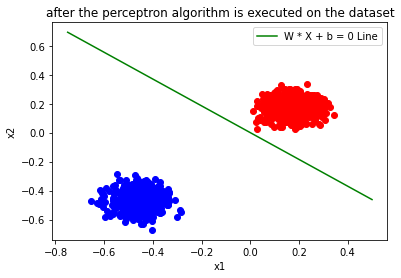

for gamma = 0.216 
it takes 2 total changes for convergence
and the upper bound is 21 (R^2/gamma^2)
----------------------------------------------------------------------------------------------------------


In [ ]:
for distance in mean:
    print("----------------------------------------------------------------------------------------------------------")

    #plotting the above fixed line
    plt.plot((-0.75,0.5),(0.75,-1))
    plt.xlabel('X1')
    plt.ylabel('X2')

    #Randomly generate data for 2 classes
    class_features1 = np.random.normal(-0.3-distance/3, 0.06,size = (500,2)) #class 1
    class_features0 = np.random.normal(0 + distance/3, 0.06,size = (500,2))   #class -1

    #Plotting the data
    plt.scatter(class_features1[:,0],class_features1[:,1],color = "blue",label = "Class 1") #class 1
    plt.scatter(class_features0[:,0],class_features0[:,1],color = "red",label = "class -1")  #class -1

    # Equation of line 1x1 + 1x2 + 0.25 = 0
    A = 1
    B = 1
    C = 0.25

    #Finding the gamma(level of seperability)
    min_dist = 10000
    for i in range(500):
            dist = find_dist(A,B,C,class_features1[i][0],class_features1[i][1])
            if dist<min_dist:
                min_dist = dist
    for i in range(500):
            dist = find_dist(A,B,C,class_features0[i][0],class_features0[i][1])
            if dist<min_dist:
                min_dist = dist

    plt.title(f"before perceptron algorithm and the gamma is {round(min_dist,3)}")
    plt.legend(["Fixed line","class 1","class -1"],loc = "upper right")
    plt.show()

    #Preparing our data by adding 1 column for bias in our data
    X = []
    y = []
    for data in class_features1:
        X.append([data[0],data[1],1])
        y.append(1)
    for data in class_features0:
        X.append([data[0],data[1],1])
        y.append(-1)
    X = torch.tensor(X,dtype = torch.float32)
    y = torch.tensor(y,dtype = torch.long)


    #Preparing the dataset and randomly shuffling it
    dataset = torch.cat((X,y.reshape(-1,1)),axis=1)
    dataset = dataset[torch.randperm(dataset.shape[0]),:]

    #preparing the parameters for perceptron algorithm
    condition = True
    w = torch.zeros(3,dtype = torch.float32)
    k = 0 #this will store the number of corrections required
    count = 0 # this will keep the count of number of iterations of whole dataset required for convergence
    while condition==True:

        count += 1
        changes = 0 # this will store the changes occured in one pass of the dataset
        for data in dataset:

            # y * (W * X + b) <= 0 condition
            if torch.tensor([data[0],data[1],data[2]]).dot(w.T) * data[3] <= 0:
                w = w + torch.tensor([data[0],data[1],data[2]]) * data[3]
                changes += 1
                k += 1


        if changes == 0:#this condition will check if there are no changes in one pass of the dataset
            condition = False
            plt.title("after the perceptron algorithm is executed on the dataset")
            plt.scatter(class_features1[:,0],class_features1[:,1],color = "blue") #class 1
            plt.scatter(class_features0[:,0],class_features0[:,1],color = "red")  #class -1
            plt.xlabel('x1')
            plt.ylabel('x2')

            # Plotting our classifier W*X + B = 0 line
            a = -w[0] / w[1]
            xx = np.linspace(-0.75,0.5)
            yy = a * xx - w[2] / w[1]
            plt.plot(xx, yy, 'k-',label = 'W * X + b = 0 Line',color = 'Green')
            plt.legend(loc = 'upper right')
            plt.show()


            #Printing the upper bound of corrections according to our gamma
            print(f"for gamma = {round(min_dist,3)} \nit takes {k} total changes for convergence")
            print(f"and the upper bound is {round(1/min_dist**2)} (R^2/gamma^2)")
            result.append([round(min_dist,4),k,k/(count)])
            print("----------------------------------------------------------------------------------------------------------")

### From the above Computation we can deduce that as the level of separability(Gamma) increases the no. of corrections of the perceptron algorithm decreases according to the below proportionality

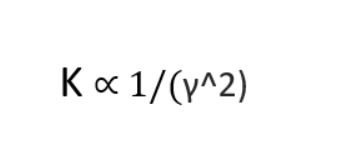

### As seen on our resultant array

In [ ]:
for data in result:
    print(f"for gamma {data[0]}")
    print()
    print(f"No of Corrections/changes            {data[1]}")
    print(f"Avg_no._of_corrections_per_iteration {data[2]}")

    print("-----------------------------------------------------------------------------------------")

for gamma 0.0475

No of Corrections/changes            17
Avg_no._of_corrections_per_iteration 8.5
-----------------------------------------------------------------------------------------
for gamma 0.1107

No of Corrections/changes            15
Avg_no._of_corrections_per_iteration 7.5
-----------------------------------------------------------------------------------------
for gamma 0.1239

No of Corrections/changes            11
Avg_no._of_corrections_per_iteration 5.5
-----------------------------------------------------------------------------------------
for gamma 0.1521

No of Corrections/changes            9
Avg_no._of_corrections_per_iteration 1.8
-----------------------------------------------------------------------------------------
for gamma 0.2161

No of Corrections/changes            2
Avg_no._of_corrections_per_iteration 1.0
-----------------------------------------------------------------------------------------


# ------------------------------------------  Question 2   -------------------------------------------------

### Generating a Linearly seprable data and plotting it

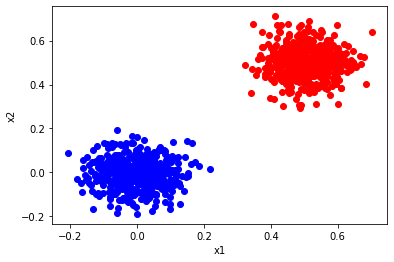

In [ ]:
class_features1 = np.random.normal(0, 0.07,size = (500,2)) #class 1
class_features0 = np.random.normal(0.5, 0.07,size = (500,2))   #class -1
plt.scatter(class_features1[:,0],class_features1[:,1],color = "blue") #class 1
plt.scatter(class_features0[:,0],class_features0[:,1],color = "red")  #class -1
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Now forming a dataset for running our gradient descent algorithm and adding a column for bias
X = []
y = []
for data in class_features1:
    X.append([data[0],data[1],1])
    y.append(1)
for data in class_features0:
    X.append([data[0],data[1],1])
    y.append(-1)
X = torch.tensor(X,dtype = torch.float32)
y = torch.tensor(y,dtype = torch.long)

# Concatenating X and Y
dataset = torch.cat((X,y.reshape(-1,1)),axis=1)

#Shuffling the dataset
dataset = dataset[torch.randperm(dataset.shape[0]),:]

In [ ]:
dataset = np.array(dataset)

### Defining Loss function(Hinge Loss)
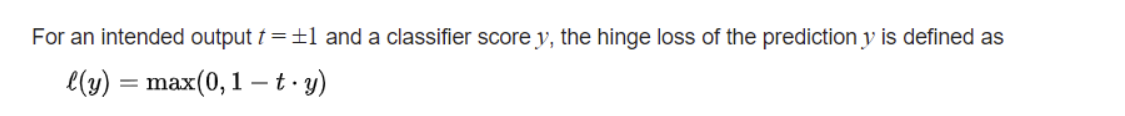

In [ ]:
def hinge_loss(y_pred,y):
    loss = 0
    for i in range(len(y_pred)):
        loss = max(0,1-y_pred[i]*y[i])
    return loss/len(y_pred)

### Gradient Formula
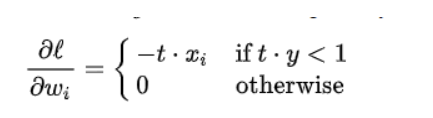

In [ ]:
def gradient(y_pred,y_train,x_train):
    grad = 0
    for i in range(len(y_pred)):
        if y_pred[i] * y_train[i] < 1:
            grad += x_train[i] * y_train[i] * -1
    return grad/len(y_pred)

### Initializing weights and learning Rate

In [ ]:
w = np.random.randn(3)
w = np.array(w,dtype = np.float32).reshape(1,3)
lr = 0.01

In [ ]:
epochs = 1500

### Running Gradient Descent Algorithm for 1500 epochs

In [ ]:
losses = []
for i in range(epochs):
    i += 1
    y_pred = np.matmul(dataset[:,:3],w.T).reshape(-1,1)
    loss = hinge_loss(y_pred,dataset[:,3].reshape(-1,1))
    losses.append(loss)
    if i%100 == 0:
        print(f'Loss at epoch {i} is {loss}')
    w = w - lr * gradient(y_pred,dataset[:,3].reshape(-1,1),dataset[:,:3])

Loss at epoch 100 is [0.00242812]
Loss at epoch 200 is [0.00202378]
Loss at epoch 300 is [0.00176274]
Loss at epoch 400 is [0.00149734]
Loss at epoch 500 is [0.00122614]
Loss at epoch 600 is [0.00095109]
Loss at epoch 700 is [0.00067578]
Loss at epoch 800 is [0.00039887]
Loss at epoch 900 is [0.00018443]
Loss at epoch 1000 is [0.00010342]
Loss at epoch 1100 is [5.4885448e-05]
Loss at epoch 1200 is [1.2827694e-05]
Loss at epoch 1300 is 0.0
Loss at epoch 1400 is 0.0
Loss at epoch 1500 is 0.0


In [ ]:
print(w)

[[-2.5344393 -1.8960814  1.0851586]]


### Now plotting the Classifier and our dataset

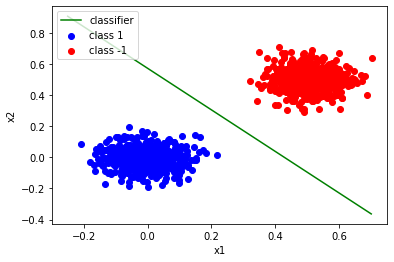

In [ ]:
plt.scatter(class_features1[:,0],class_features1[:,1],color = "blue",label = 'class 1') #class 1
plt.scatter(class_features0[:,0],class_features0[:,1],color = "red", label = 'class -1')  #class -1
plt.xlabel('x1')
plt.ylabel('x2')
xx = np.linspace(-0.25,0.7)
a = -w[0][0] / w[0][1]
yy = a * xx - w[0][2] / w[0][1]
plt.plot(xx, yy,label = 'classifier',color = 'Green')
plt.legend(loc ="upper left");
plt.show()

### Plotting The graph of loss vs epochs

<function matplotlib.pyplot.show(*args, **kw)>

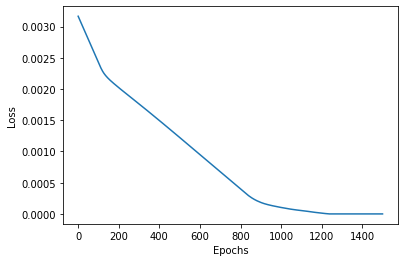

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(np.arange(0,len(losses),1),losses)
plt.show

# ------------------------------------------  Question 3   -------------------------------------------------

### Creating a Non Linearly seperable dataset

In [ ]:
x = []
y = []
r1 = 3
r2 = 1.5

### x11 = R1 * Cos(i)
### x12 = R1 * Sin(i)   ,where I = 1.....625

### x21 = R2 * Cos(i)
### x22 = R2 * Sin(i)   ,where i = 1.....625

In [ ]:
for i in range(625):
    noise = random.randint(0,5)/10
    x1 = r1*math.cos(i)
    x2 = r1*math.sin(i)
    x.append([x1 + noise,x2 - noise])
    y.append(1)
    x1 = r2*math.cos(i)
    x2 = r2*math.sin(i)
    x.append([x1 - noise,x2 + noise])
    y.append(0)

### Plotting our data

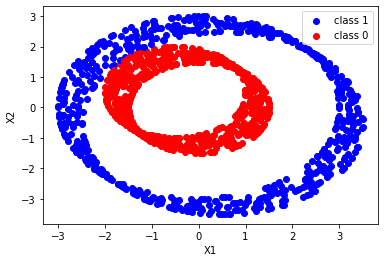

In [ ]:
for i in range(1250):
    if y[i] == 1:
        plt.scatter(x[i][0],x[i][1],color='blue')
    else:
        plt.scatter(x[i][0],x[i][1],color='red')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(['class 1','class 0'] , loc = 'upper right')
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('red')
plt.show()

### transforming our output into one hot vector form

In [ ]:
new_y = []
for i in range(1250):
    if(y[i] == 0):
        new_y.append([1,0])
    else:
        new_y.append([0,1])

In [ ]:
y = np.array(new_y)
x = np.array(x)

In [ ]:
y.shape

(1250, 2)

In [ ]:
x.shape

(1250, 2)

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [ ]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

### Defining Relu activation function and Soft max function

In [ ]:
def relu(x):
    return np.maximum(0,x)

def softmax(x):
    exp = np.exp(x)
    return exp/np.sum(exp,axis = 0)

### Derivative of relu

In [ ]:
def derivative_relu(x):
    return np.array(x>0,dtype = np.float32)

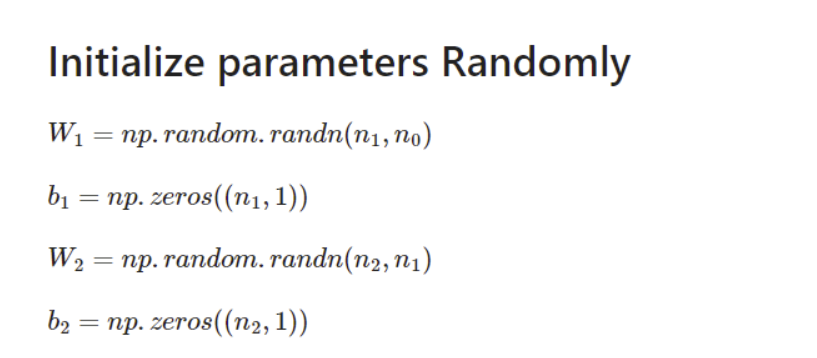

In [ ]:
#n_x = number of neurons at input layer
#n_h = number of neurons at hidden layer
#n_y = number of neurons at output layer
def initialize_parameters(n_x,n_h,n_y):
    w1 = np.random.randn(n_h,n_x)
    b1 = np.zeros((n_h,1))

    w2 = np.random.randn(n_y,n_h)
    b2 = np.zeros((n_y,1))

    parameters = []
    parameters.append(w1)
    parameters.append(b1)
    parameters.append(w2)
    parameters.append(b2)

    return parameters

### Parameters =  List of all parameters (W1,B1,W2,B2)

### Derivatives = List of all partial Derivatives (dW1,dB1,dW2,dB2)

### Forward_result = list of all intermediate outputs and activations

### m = No. of observations

### n = No. of Classes

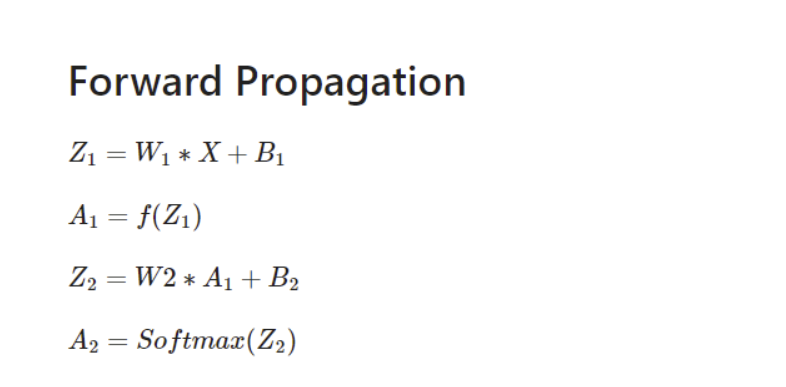

In [ ]:
def forward(x,parameters):
    w1 = parameters[0]
    b1 = parameters[1]
    w2 = parameters[2]
    b2 = parameters[3]

    z1 = w1 @ x + b1
    a1 = relu(z1)

    z2 = w2 @ a1 + b2
    a2 = softmax(z2)

    forward_result = []
    forward_result.append(z1)
    forward_result.append(a1)
    forward_result.append(z2)
    forward_result.append(a2)

    return forward_result

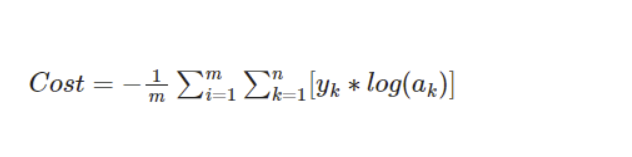

In [ ]:
def loss(a2,y):
    m = y.shape[1]
    n = y.shape[0]
    loss = 0
    for i in range(m):
        for j in range(n):
            loss += y[j][i] * np.log(a2[j][i])

    return -loss/m

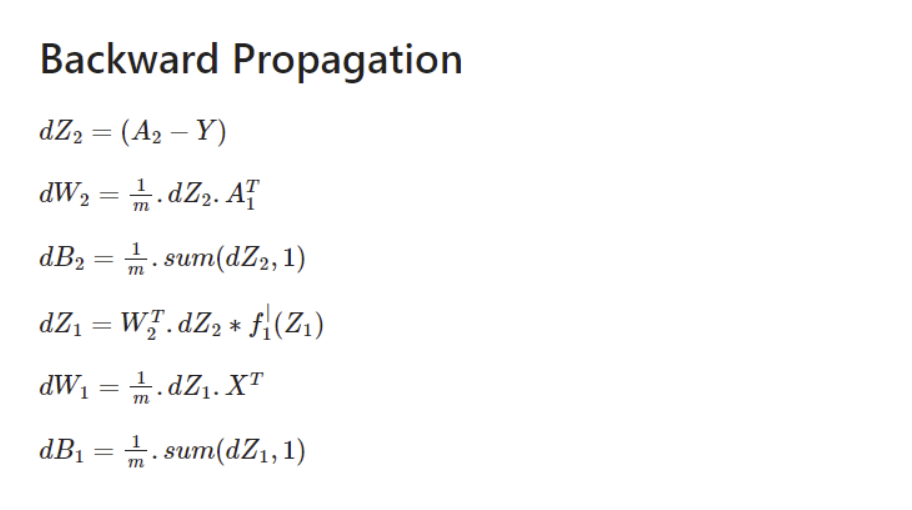

link for derivations https://drive.google.com/file/d/1ppi_Wve7IK0ESIH__o-q5CuZKN2JMp-n/view?usp=share_link

In [ ]:
def backward(x,y,parameters,forward_result):
    w1 = parameters[0]
    b1 = parameters[1]
    w2 = parameters[2]
    b2 = parameters[3]
    a1 = forward_result[1]
    a2 = forward_result[3]

    m = x.shape[1] # No. of observations

    dz2 = (a2-y)
    dw2 = (1/m)*(dz2 @ a1.T)
    db2 = (1/m)*np.sum(dz2,axis = 1,keepdims = True)



    dz1 = (1/m)*np.dot(w2.T,dz2)*derivative_relu(a1)
    dw1 = (1/m)*np.dot(dz1,x.T)
    db1 = (1/m)*np.sum(dz1,axis = 1,keepdims = True)


    derivatives = []
    derivatives.append(dw1)
    derivatives.append(db1)
    derivatives.append(dw2)
    derivatives.append(db2)

    return derivatives

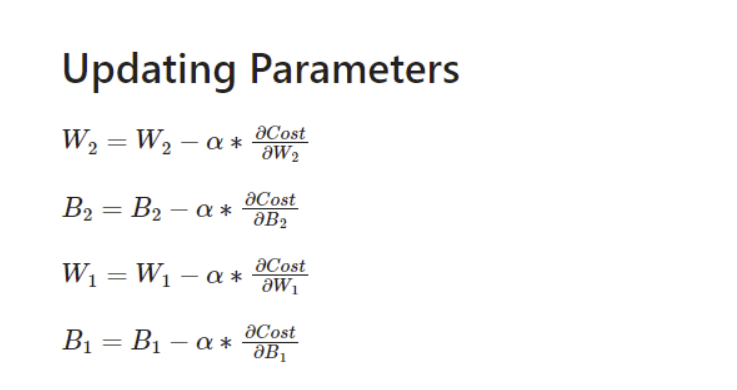

In [ ]:
def update(parameters,derivatives):
    w1 = parameters[0]
    b1 = parameters[1]
    w2 = parameters[2]
    b2 = parameters[3]

    dw1 = derivatives[0]
    db1 = derivatives[1]
    dw2 = derivatives[2]
    db2 = derivatives[3]

    #Here we are updating our parameters according to our gradient descent rule with learning rate = 0.1
    w1 = w1 - 0.1*dw1
    b1 = b1 - 0.1*db1
    w2 = w2 - 0.1*dw2
    b2 = b2 - 0.1*db2

    parameters = []
    parameters.append(w1)
    parameters.append(b1)
    parameters.append(w2)
    parameters.append(b2)

    return parameters

### Final MLP function that will perform forward pass,backward pass and upadtion of parameters for given no. of iterations and finally returns the parameters

In [ ]:
#n_x = number of neurons at input layer
#n_h = number of neurons at hidden layer
#n_y = number of neurons at output layer
def MLP(x,y,n_h,epochs):
    n_x = 2
    n_y = 2

    parameters = initialize_parameters(n_x,n_h,n_y)

    losses = []
    for i in range(epochs):
        i += 1
        forward_result = forward(x,parameters) # forward pass
        l = loss(forward_result[3],y)          # calculating binary cross entropy loss
        if(i % 100 == 0 or i == 1):
            print(f"for iteration {i} loss is {l}")
        losses.append(l)                       # storing loss for plotting purpose
        derivatives = backward(x,y,parameters,forward_result) #backward pass

        parameters = update(parameters,derivatives) # updating parameters

    return parameters,losses

In [ ]:
model,losses = MLP(x_train,y_train,5,epochs)

for iteration 1 loss is 2.656985088636063
for iteration 100 loss is 0.44634469854175973
for iteration 200 loss is 0.3524453841981268
for iteration 300 loss is 0.3011756087695683
for iteration 400 loss is 0.26823851500612494
for iteration 500 loss is 0.2447985108162063
for iteration 600 loss is 0.22694417122444743
for iteration 700 loss is 0.21268299540354785
for iteration 800 loss is 0.2008900405932668
for iteration 900 loss is 0.19087910139728487
for iteration 1000 loss is 0.18220587533587534
for iteration 1100 loss is 0.17456901757047094
for iteration 1200 loss is 0.16774727783865992
for iteration 1300 loss is 0.16159361879137854
for iteration 1400 loss is 0.1559923589252482
for iteration 1500 loss is 0.15085773528982846


### Plotting Loss vs Epoch graph

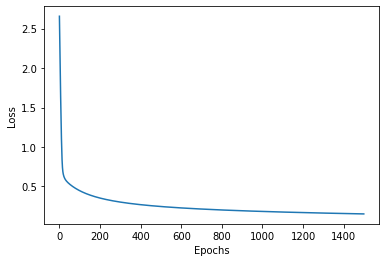

In [ ]:
plt.plot(np.arange(0,epochs),losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### Testing the Accuracy

In [ ]:
forward_result = forward(x_test,model)

In [ ]:
y_pred = forward_result[3]
y_pred = np.argmax(y_pred,0)
y_test = y_test.T

In [ ]:
y_true = []
for i in range(len(y_test)):
    y_true.append(y_test[i].argmax())

print("Accuracy is ",accuracy_score(y_true,y_pred))

Accuracy is  0.988
